<a href="https://colab.research.google.com/github/shivadattasaiyaga/CODEWAY/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,910939.000000,9.109390e+05,910938.000000,910938.000000,910938.000000,910938.000000,9.109380e+05,9.109380e+05,910938.000000,910938.000000,910937.000000
mean,227738.294706,4.175411e+17,70.027215,48796.024458,38.540160,-90.216936,8.886480e+04,1.357164e+09,38.539539,-90.216821,0.005318
std,131489.796776,1.309348e+18,154.004108,26884.861194,5.067156,13.746299,3.020520e+05,2.262074e+07,5.101431,13.758831,0.072728
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.027422,-166.671575,0.000000
25%,113867.000000,1.800400e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.335346e+09,34.749896,-96.888179,0.000000
50%,227734.000000,3.520550e+15,47.450000,48174.000000,39.371600,-87.461600,2.443000e+03,1.371857e+09,39.371009,-87.423868,0.000000
75%,341601.500000,4.642255e+15,83.180000,72011.000000,41.894800,-80.158000,2.032800e+04,1.378938e+09,41.953821,-80.231600,0.000000
max,457388.000000,4.992346e+18,25086.940000,99921.000000,66.693300,-67.950300,2.906700e+06,1.386641e+09,67.510267,-9.000000,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(453550, 23)
(457389, 23)


In [ ]:
data=data.dropna(axis=0)

In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  910937.000000  9.109370e+05  910937.000000  910937.000000   
mean   227737.794715  4.175420e+17      70.027283   48795.994667   
std    131489.508116  1.309350e+18     154.004179   26884.860915   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    113867.000000  1.800400e+14       9.650000   26237.000000   
50%    227734.000000  3.520550e+15      47.450000   48174.000000   
75%    341601.000000  4.642255e+15      83.180000   72011.000000   
max    457387.000000  4.992346e+18   25086.940000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  910937.000000  910937.000000  9.109370e+05  9.109370e+05   
mean       38.540168     -90.216931  8.886490e+04  1.357164e+09   
std         5.067152      13.746306  3.020521e+05  2.262073e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.430000e+02  1

In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
457384      457384   2020-12-10 01:58:35  3538520143479972   
457385      457385   2020-12-10 01:59:18  3521815216091574   
457386      457386   2020-12-10 01:59:28  4908846471916297   
457387      457387   2020-12-10 02:00:13  4474324669797121   
457388      457388   2020-12-10 02:00:34  3527063666782582   

                                    merchant        category    amt  \
0                      fraud_Kirlin and Sons   personal_care   2.86   
1                       fraud_Sporer-Keebler   personal_care  29.84   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28   
3                          fraud_Haley Group        misc_pos  60.05   
4                      fraud_Johnston-Casper          travel   3.19   
...                                      ...             ...    ...   
457384                      fraud_Huels-Hahn   gas_transport  64.49   
457385                     fraud_Schmitt Inc   gas_transport  72.51   
457386                   fraud_Cassin-Harvey     grocery_net  48.70   
457387                      fraud_Harris Inc   gas_transport  45.85   
457388                 fraud_Turner and Sons    shopping_pos   8.21   

            first       last gender                       street  ...  \
0            Jeff    Elliott      M            351 Darlene Green  ...   
1          Joanne   Williams      F             3638 Marsh Union  ...   
2          Ashley      Lopez      F         9333 Valentine Point  ...   
3           Brian   Williams      M  32941 Krystal Mill Apt. 552  ...   
4          Nathan     Massey      M     5783 Evan Roads Apt. 465  ...   
...           ...        ...    ...                          ...  ...   
457384  Cassandra      Nunez      F  9572 Austin Forge Suite 612  ...   
457385      Wayne      Marsh      M           172 Leonard Island  ...   
457386     Lauren     Torres      F            03030 White Lakes  ...   
457387    Matthew    Russell      M  168 Michael Coves Suite 343  ...   
457388     Amanda  Alexander      F             21810 James Mall  ...   

            lat      long  city_pop                        job         dob  \
0       33.9659  -80.9355    333497        Mechanical engineer  1968-03-19   
1       40.3207 -110.4360       302     Sales professional, IT  1990-01-17   
2       40.6729  -73.5365     34496          Librarian, public  1970-10-21   
3       28.5697  -80.8191     54767               Set designer  1987-07-25   
4       44.2529  -85.0170      1126         Furniture designer  1955-07-06   
...         ...       ...       ...                        ...         ...   
457384  41.5686  -83.3632       269      Insurance underwriter  1965-09-15   
457385  39.7532 -105.6356       565        Mental health nurse  1978-08-27   
457386  32.2779  -97.2351      5875  Radiographer, therapeutic  1992-07-24   
457387  37.7773 -119.0825       633     Health service manager  1927-09-09   
457388  30.9000  -94.7547        99        Colour technologist  1965-11-21   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
457

In [ ]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
453545      453545   2019-07-20 15:24:35   372509258176510   
453546      453546   2019-07-20 15:25:08  4424338559877976   
453547      453547   2019-07-20 15:25:27  4067137330196900   
453548      453548   2019-07-20 15:25:38     4917226033950   
453549      453549   2019-07-20 15:26:39  4482427013979020   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
453545                   fraud_Kihn-Schuster    food_dining   47.93   
453546  fraud_Streich, Rolfson and Wilderman      kids_pets   55.38   
453547                        fraud_Kuhn LLC   shopping_pos  332.84   
453548                  fraud_White and Sons           home   64.37   
453549                  fraud_Cartwright PLC        kids_pe     NaN   

            first     last gender                        street  ...      lat  \
0        Jennifer    Banks      F                561 Perry Cove  ...  36.0788   
1       Stephanie     Gill      F  43039 Riley Greens Suite 393  ...  48.8878   
2          Edward  Sanchez      M      594 White Dale Suite 530  ...  42.1808   
3          Jeremy    White      M   9443 Cynthia Court Apt. 038  ...  46.2306   
4           Tyler   Garcia      M              408 Bradley Rest  ...  38.4207   
...           ...      ...    ...                           ...  ...      ...   
453545    Kristen   Hanson      F             26544 Andrea Glen  ...  42.9147   
453546     Denise  Barnett      F           23220 Eaton Harbors  ...  40.8130   
453547  Christina    Eaton      F             3256 Brooks Field  ...  33.9315   
453548       Adam   Keller      M              32600 Cobb Curve  ...  32.2844   
453549        NaN      NaN    NaN                           NaN  ...      NaN   

            long  city_pop                                job         dob  \
0       -81.1781    3495.0          Psychologist, counselling  1988-03-09   
1      -118.2105     149.0  Special educational needs teacher  1978-06-21   
2      -112.2620    4154.0        Nature conservation officer  1962-01-19   
3      -112.1138    1939.0                    Patent attorney  1967-01-12   
4       -79.4629      99.0     Dance movement psychotherapist  1986-03-28   
...          ...       ...                                ...         ...   
453545  -83.4845    6951.0          Learning disability nurse  1985-06-18   
453546  -83.4196     118.0              Private music teacher  1957-11-12   
453547  -87.6194    1186.0             Politician's assistant  1986-11-12   
453548  -86.9920     800.0          Learning disability nurse  1932-09-17   
453549       NaN       NaN                                NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(453550, 23)
(457389, 23)
(910937, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

453549
0


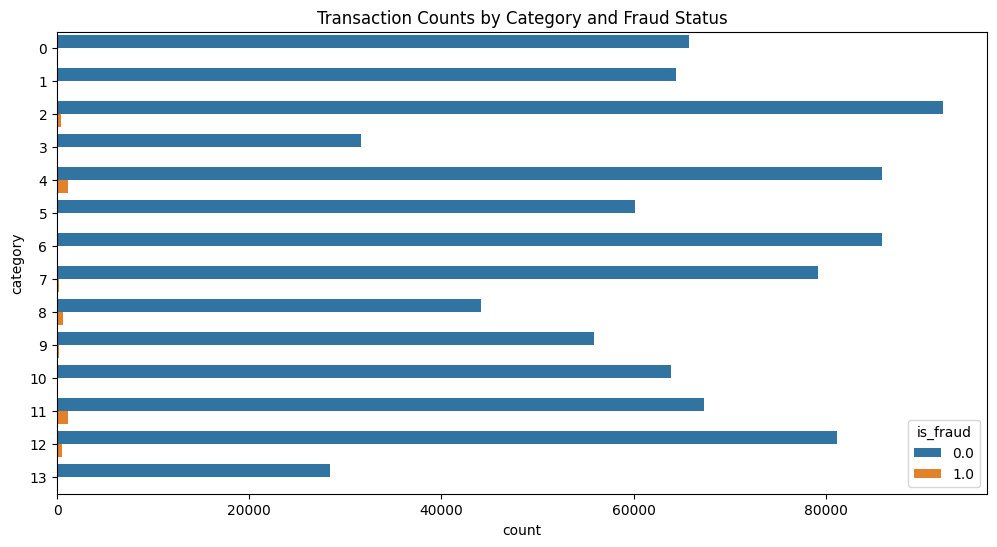

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

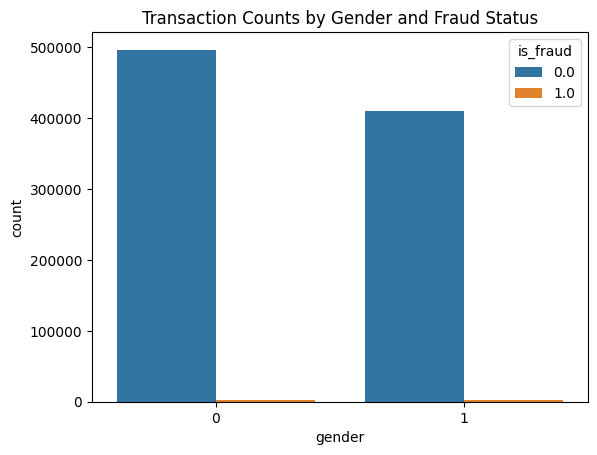

In [ ]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

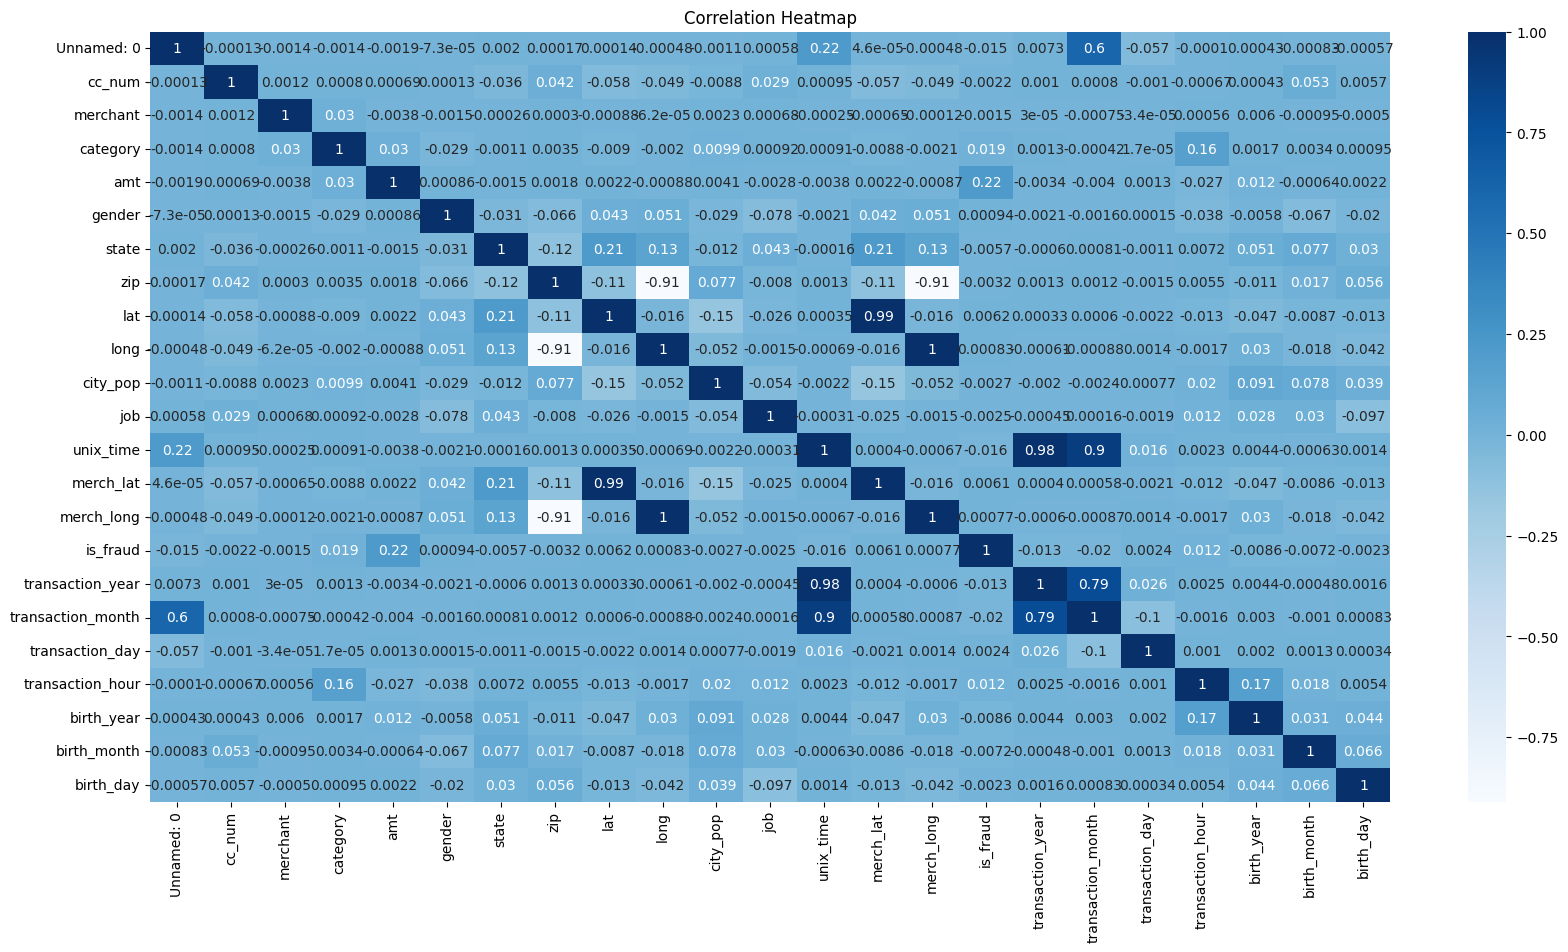

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    181181
         1.0       0.00      0.00      0.00      1007

    accuracy                           0.99    182188
   macro avg       0.50      0.50      0.50    182188
weighted avg       0.99      0.99      0.99    182188

[[181181      0]
 [  1007      0]]
Accuracy: 0.9944727424418732


In [ ]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    181181
         1.0       0.00      0.00      0.00      1007

    accuracy                           0.99    182188
   macro avg       0.50      0.50      0.50    182188
weighted avg       0.99      0.99      0.99    182188

[[181181      0]
 [  1007      0]]
Accuracy: 0.9944727424418732
